<a href="https://colab.research.google.com/github/alejandromunizsiques/Proyecto-Covid/blob/main/Estudio_Covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) Introduccion

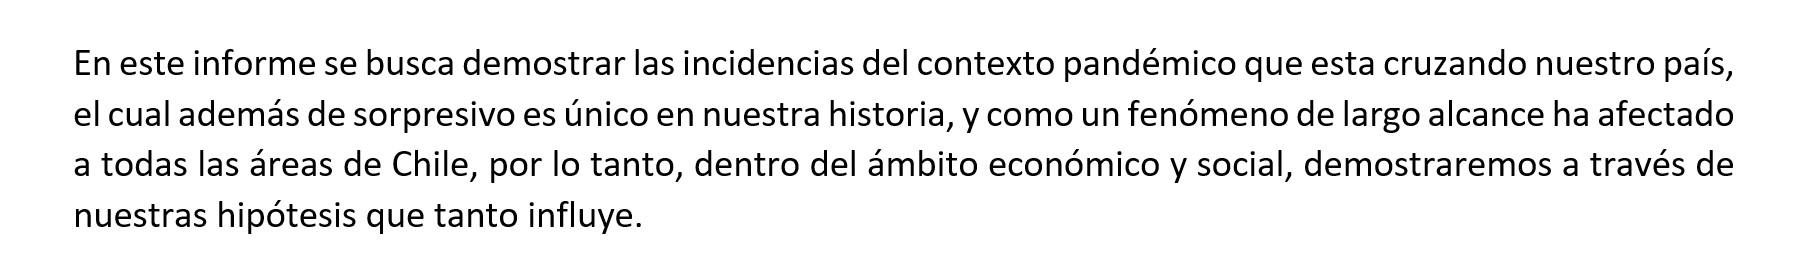

# 2)	Planteamiento de hipótesis y contextual de la invesgicacion 

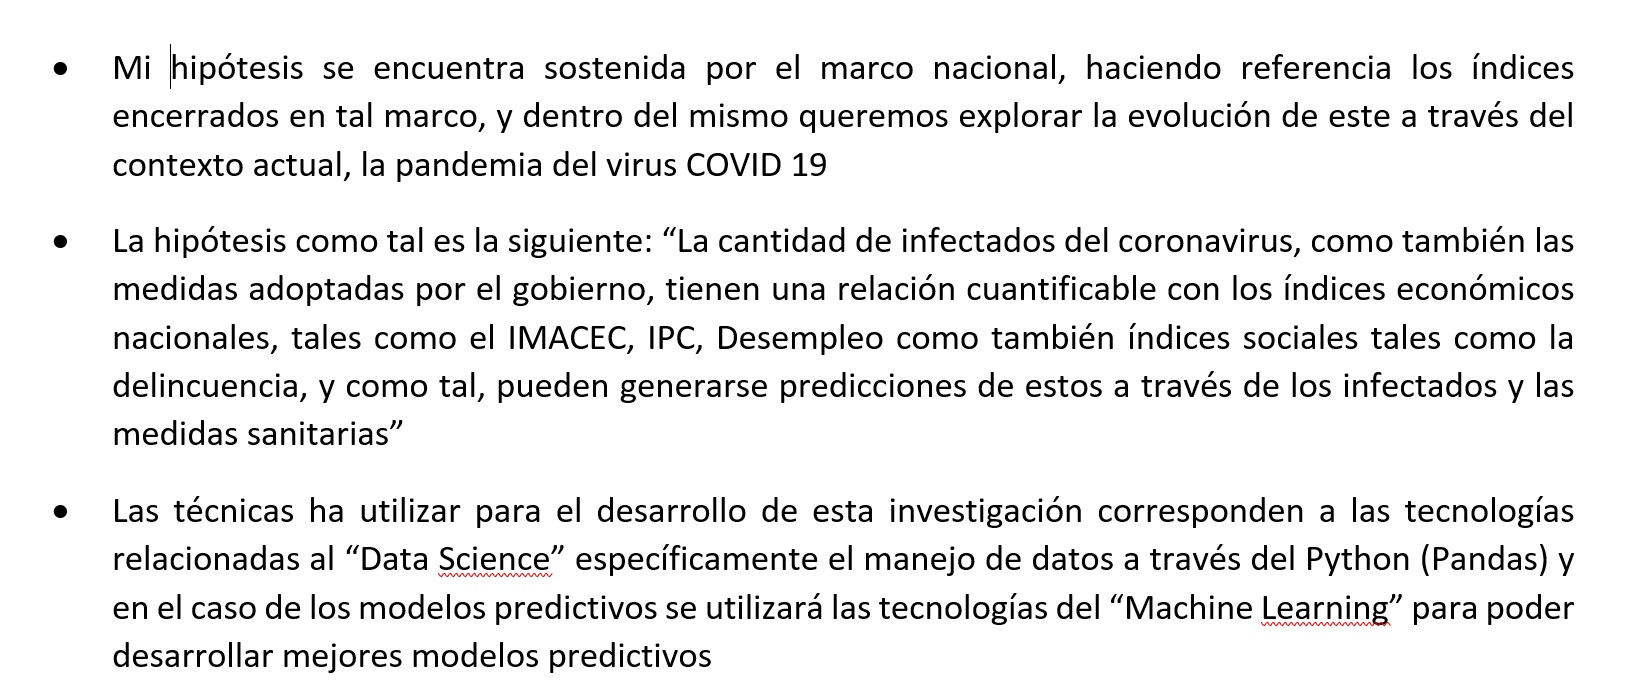

## 2.1) 	Definición de objetivos específicos

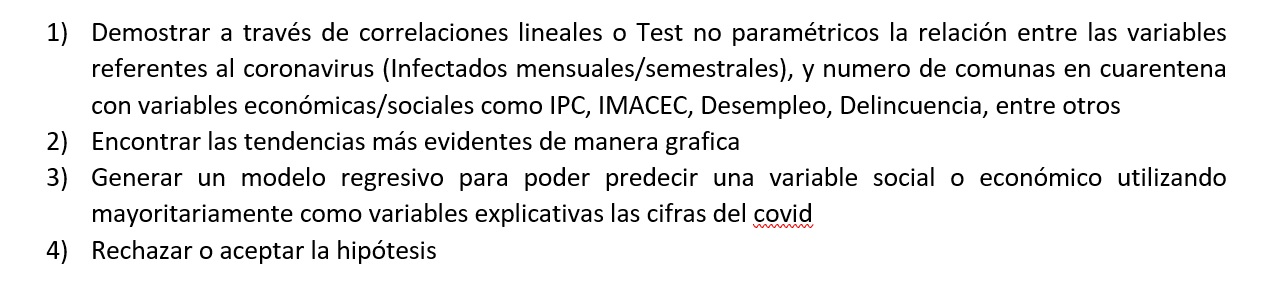

# Fuentes de recoleccion de datos 

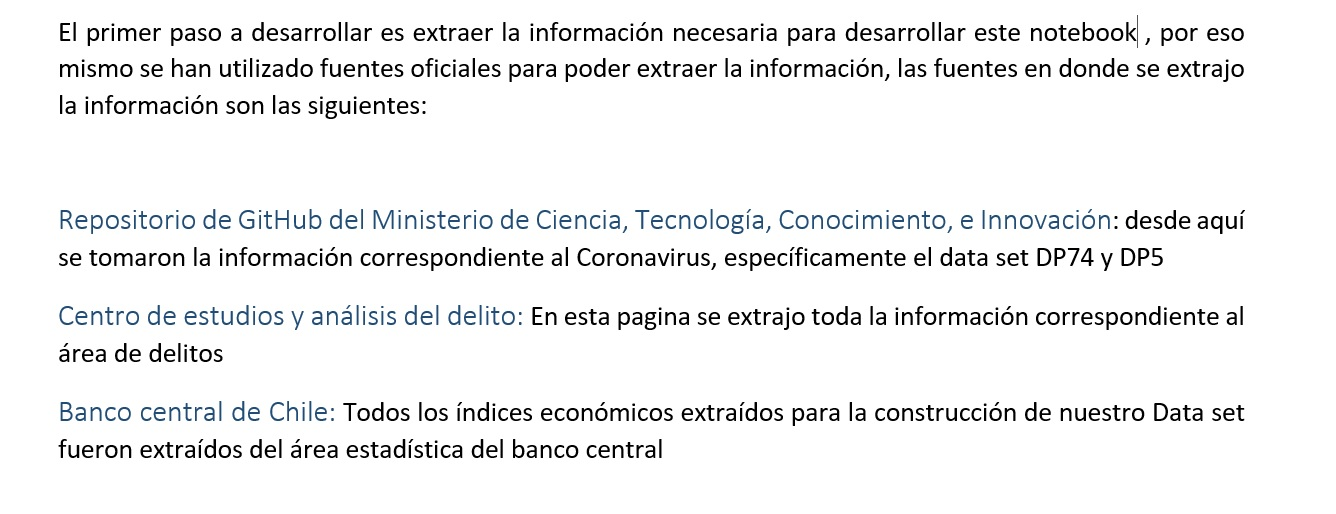

# Vitacora investigativa 1) Aumento de observaciones

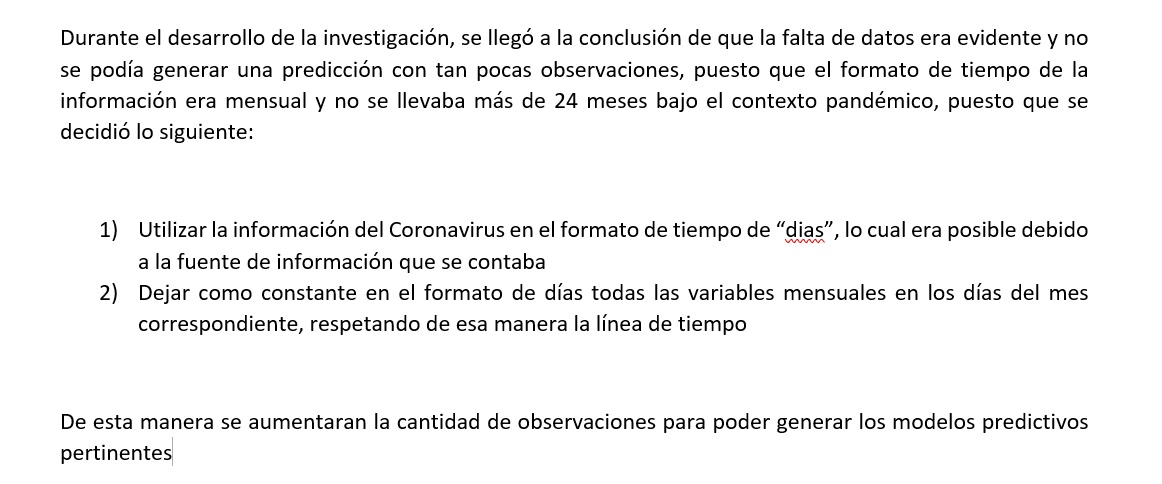

# Importacion de librerias 

In [1]:
!pip install klib
!pip install --upgrade klib
import klib as klib
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV


     |████████████████████████████████| 133 kB 40.3 MB/s 
     |████████████████████████████████| 6.8 MB 41.6 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.1
    Uninstalling scikit-learn-1.0.1:
      Successfully uninstalled scikit-learn-1.0.1
  Attempting uninstall: Jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.23.2 which is incompatible.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.0.3 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


# Diccionario del dataset

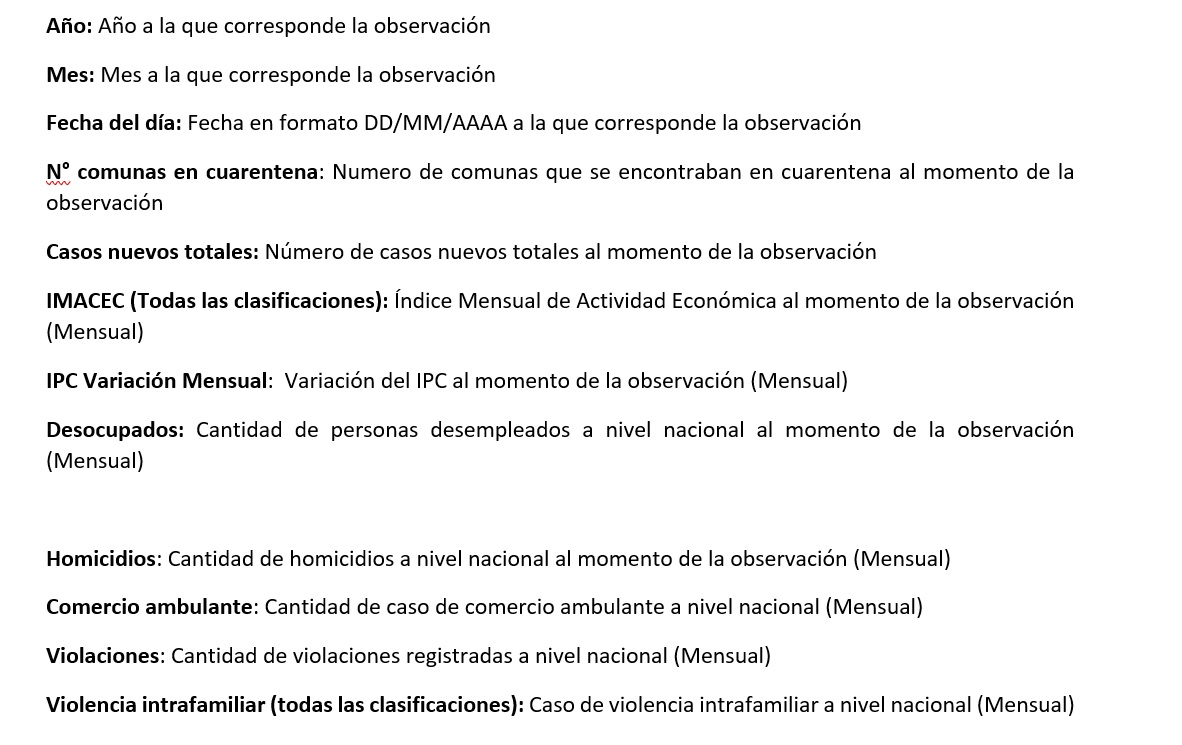

# Montaje del dataset

In [2]:
df = pd.read_excel("/content/drive/MyDrive/Ejercicios personales Data Science/Dataset_Casos_Covid_por_dias.xlsx",)
df= df.dropna()
df

,Año,Mes,Fecha del dia,N° Comunas en cuarentena,Casos Nuevos Totales,Imacec,IPC_Variacion_Mensual,Desocupados,Homicidios,Comercio ambulante o clandestino,Violaciones,Violencia intrafamiliar a adulto mayor,Violencia intrafamiliar a mujer,Violencia intrafamiliar a niño,Violencia intrafamiliar no clasificado,IMACEC Servicios,Imacec Comercio
0,2020,Julio,2020-07-28,60,1876,96.100070,0.1,994.168223,74.0,848.0,330.0,277.0,6913.0,218.0,225.0,99.8,94.3
1,2020,Julio,2020-07-29,63,1773,96.100070,0.1,994.168223,74.0,848.0,330.0,277.0,6913.0,218.0,225.0,99.8,94.3
2,2020,Julio,2020-07-30,63,1948,96.100070,0.1,994.168223,74.0,848.0,330.0,277.0,6913.0,218.0,225.0,99.8,94.3
3,2020,Julio,2020-07-31,63,2123,96.100070,0.1,994.168223,74.0,848.0,330.0,277.0,6913.0,218.0,225.0,99.8,94.3
4,2020,agosto,2020-08-01,63,1979,101.066025,0.1,993.505385,58.0,641.0,336.0,295.0,7749.0,257.0,347.0,104.4,109.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,2021,junio,2021-06-27,140,4488,115.929434,0.1,776.890798,47.0,893.0,337.0,353.0,9115.0,265.0,473.0,122.2,130.9
335,2021,junio,2021-06-28,140,4075,115.929434,0.1,776.890798,47.0,893.0,337.0,353.0,9115.0,265.0,473.0,122.2,130.9
336,2021,junio,2021-06-29,115,2648,115.929434,0.1,776.890798,47.0,893.0,337.0,353.0,9115.0,265.0,473.0,122.2,130.9
337,2021,junio,2021-06-30,115,2148,115.929434,0.1,776.890798,47.0,893.0,337.0,353.0,9115.0,265.0,473.0,122.2,130.9


# Matriz de correlacion de Pearson

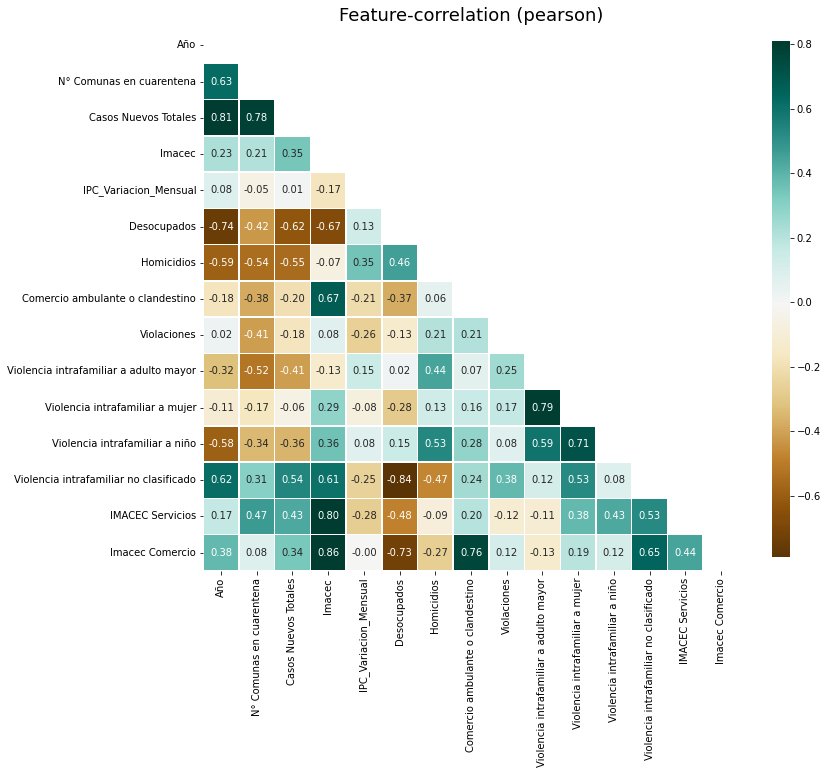

In [4]:
klib.corr_plot(df)

Se encuentran correlaciones muy interesantes, sobre todo las correspondientes a las variables de Homicidios y Desocupados, por lo que se decide hacer un "Analisis exploratorio" mas de cerca sobre sus correlaciones

# Analisis exploratorio

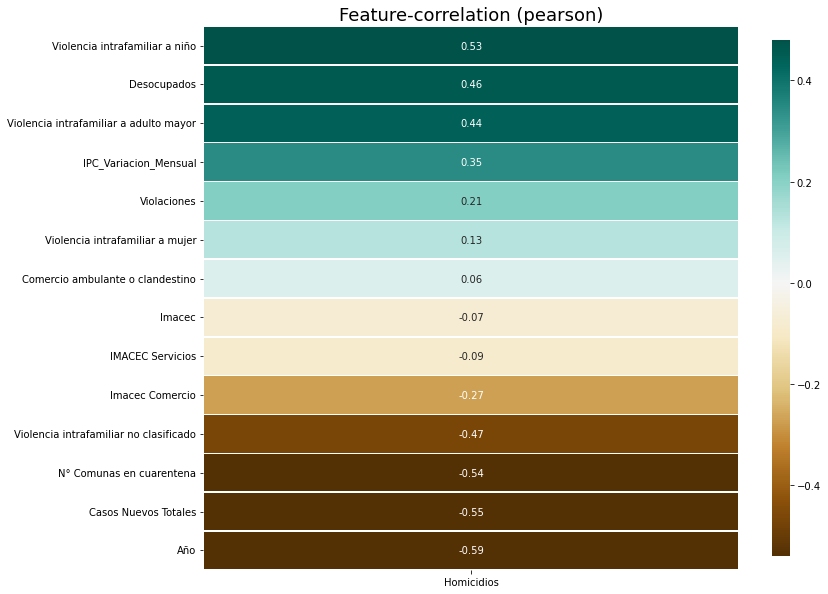

In [ ]:
klib.corr_plot(df, target='Homicidios')

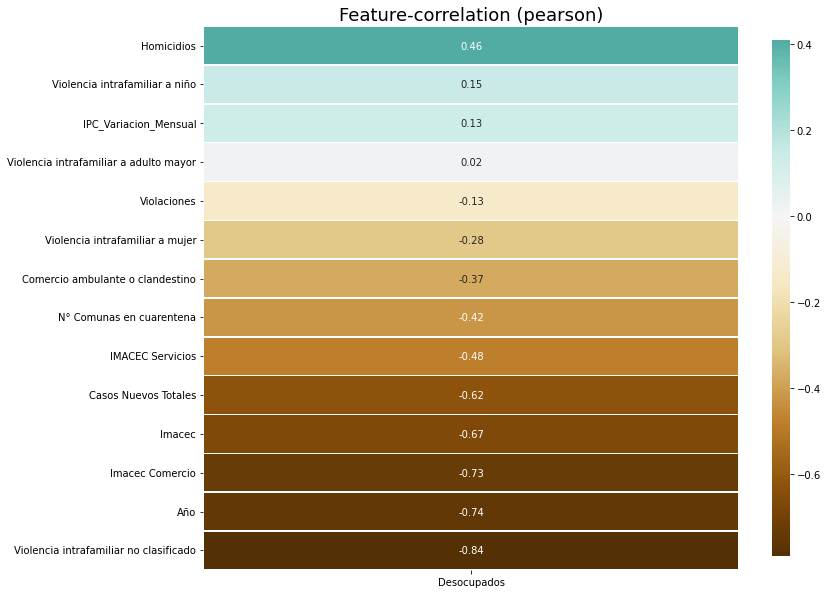

In [ ]:
klib.corr_plot(df, target='Desocupados')

En vista de su correlacion medianamente fuerte con las variables COVID se decide seleccionar tanto las variable de Homicidios como la de Desocupados como target de nuestros modelos predictivos

# Entrenamiento y division

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error




X = df[["N° Comunas en cuarentena","Casos Nuevos Totales","Desocupados"]]
y = df["Homicidios"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)




En este modelo se utilizan como Features el numero de comunas en cuarentena, los nuevos casos totales y la cantidad de desocupados para poder predicr los homicidios, se utiliza un tamaño de entrenamiento del 70% de los datos y se testea con el 30% restante

# Baggin Regresor

In [8]:
from sklearn.ensemble import BaggingRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV

Baggin = BaggingRegressor()
pipe_6 = Pipeline(steps=[('scaler', StandardScaler()), ('Baggin',Baggin)])

param_grid6 = {'Baggin__base_estimator': [None, LinearRegression(), KNeighborsRegressor()],
          'Baggin__n_estimators': [20,50,100],
          'Baggin__max_samples': [0.5,1.0],
          'Baggin__max_features': [0.5,1.0],
          'Baggin__bootstrap': [True, False],
          'Baggin__bootstrap_features': [True, False]} 

grid6 = RandomizedSearchCV(estimator = pipe_6, param_distributions = param_grid6, scoring = 'r2', cv=10, n_iter = 100)

grid6.fit(X_train,y_train)

print("Mejor score R2): ", grid6.best_score_)   #Codigo sacado de Abolt github
print("Mejores hiperparámetros: ", grid6.best_params_)
print("Mejor modelo: ", grid6.best_estimator_)

Mejor score R2):  0.9607096660487338
Mejores hiperparámetros:  {'Baggin__n_estimators': 50, 'Baggin__max_samples': 1.0, 'Baggin__max_features': 1.0, 'Baggin__bootstrap_features': False, 'Baggin__bootstrap': True, 'Baggin__base_estimator': None}
Mejor modelo:  Pipeline(steps=[('scaler', StandardScaler()),
                ('Baggin', BaggingRegressor(n_estimators=50))])


El primer modelo es un Bagging Regresor, se utiliza un Pipeline en el cual se escalan los datos para que posteriormente estos utilizandos en el modelo, ademas de esto se utilizo un RandomGridSearch para optimizar los Hiperparametros del modelo, lo que dio como resultado un Coeficiente de determinacion de 0.95

In [9]:
grid6.best_estimator_.fit(X_train, y_train)
R2 = grid6.best_estimator_.score(X_test, y_test)
y_predict_Desempleo = grid6.best_estimator_.predict(X_test)

mse = mean_squared_error(y_predict_Desempleo,y_test.values)
mae = mean_absolute_error(y_predict_Desempleo,y_test.values)

print("Coefficiente de determinacion:", R2)
print("Error promedio cuadratico:",mse)
print("Error medio absoluto:",mae)


Coefficiente de determinacion: 0.9152066281962252
Error promedio cuadratico: 28.225866666666672
Error medio absoluto: 1.784705882352941


re entrenamos con los mejores hiperparametros lo testeamos, entregandonos un todavia muy buen coeficiente de determinacion, pero con un moderado error promedio cuadratico y un bajo error medio absoluto.

Explorando los datos pudimos ver que una de las predicciones estaba lejos del valor real, por lo tanto el error promedio cuadratico lo penalizo de manera severa

# Random Forest

In [10]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()
pipe_7 = Pipeline(steps=[('scaler', StandardScaler()), ('RF',RF)])
   
param_grid7 = { 
            "RF__n_estimators"      : [10,20,30],
            "RF__max_features"      : ["auto", "sqrt", "log2"],
            "RF__min_samples_split" : [2,4,8],
            "RF__bootstrap": [True, False],
            }



grid7 = RandomizedSearchCV(estimator = pipe_7, param_distributions = param_grid7, scoring = 'r2', cv=10, n_iter = 100)
grid7.fit(X_train,y_train)

print("Mejor score R2): ", grid7.best_score_)   
print("Mejores hiperparámetros: ", grid7.best_params_)
print("Mejor modelo: ", grid7.best_estimator_)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:282: UserWarning: The total space of parameters 54 is smaller than n_iter=100. Running 54 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Mejor score R2):  0.9556749022258704
Mejores hiperparámetros:  {'RF__n_estimators': 20, 'RF__min_samples_split': 4, 'RF__max_features': 'auto', 'RF__bootstrap': True}
Mejor modelo:  Pipeline(steps=[('scaler', StandardScaler()),
                ('RF',
                 RandomForestRegressor(min_samples_split=4, n_estimators=20))])


In [12]:
grid7.best_estimator_.fit(X_train, y_train)
R2 = grid7.best_estimator_.score(X_test, y_test)
y_predict_Desempleo = grid7.best_estimator_.predict(X_test)

mse = mean_squared_error(y_predict_Desempleo,y_test.values)
mae = mean_absolute_error(y_predict_Desempleo,y_test.values)

print("Coefficiente de determinacion:", R2)
print("Error promedio cuadratico:",mse)
print("Error medio absoluto:",mae)

Coefficiente de determinacion: 0.8904306865534883
Error promedio cuadratico: 36.473238017429196
Error medio absoluto: 1.982516339869281


podemos observar que el Random Forest nos entrego peores resultados que el Bagging Regresor en el re entrenamiento 

In [ ]:
grid7.best_estimator_.fit(X_train, y_train)
R2_1 = grid7.best_estimator_.score(X_test, y_test)
y_predict_RF = grid7.best_estimator_.predict(X_test)

mse_RF = mean_squared_error(y_predict_RF,y_test.values)
mae_RF = mean_absolute_error(y_predict_RF,y_test.values)

print("Coefficiente de determinacion:", R2_1)
print("Error promedio cuadratico:",mse_RF)
print("Error medio absoluto:",mae_RF)

Coefficiente de determinacion: 0.8998974435972991
Error promedio cuadratico: 33.321960784313724
Error medio absoluto: 1.8078431372549018


# Conclusion

Finalmente podemos afirmar que se pueden hacer modelos precisos sobre variables sociales de tipo economica o dilictual utilizando la informacion del Covid junto a otras mas economicas, como es el caso del modelo de prediccion de homicidios